<a href="https://colab.research.google.com/github/AkshayKohad/ML-Tutorial/blob/main/Q1_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [355]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
from sklearn.model_selection import train_test_split

<a id="LoadData"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Loading Data</center></h1>



In [356]:
data = pd.read_csv('Q1Data.csv')

In [357]:

data.head()

data = data.iloc[:,[0,1,2,3,4,5,22]]

data['Genus'] = pd.factorize(data['Genus'])[0]
data['Genus']
unique_counts = data["Genus"].value_counts()
print(unique_counts)
data.head()

0    4150
3    1593
1     542
2     310
4     270
7     148
5     114
6      68
Name: Genus, dtype: int64


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,Genus
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,0
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,0
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,0
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,0
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,0


In [358]:
val = list(data.iloc[:,6])

num_val = data.values

print(num_val.shape)

(7195, 7)


In [359]:
unique_values = list(set(val))
unique_values

[0, 1, 2, 3, 4, 5, 6, 7]

In [360]:
predictor = data.iloc[:,[0,1,2,3,4,5]]
response = data.iloc[:,[6]]

print(predictor)
print(response)
predictor_Training_sklearn,predictor_test_sklearn,response_Training_sklearn,response_test_sklearn = train_test_split(predictor,response,test_size=0.2,shuffle=True,random_state=0)
predictor_Training,predictor_test,response_Training,response_test = train_test_split(predictor,response,test_size=0.8,shuffle=True,random_state=0)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884
...        ...       ...       ...       ...       ...       ...
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596

[7195 rows x 6 columns]
      Genus
0         0
1         0
2         0
3         0
4         0
...     ...
7190      7
7191      7
7192      7
7193      7
7194      7

[7195 rows x 1 columns]


In [361]:
predictor_Training = predictor_Training.values
predictor_test = predictor_test.values
response_Training = response_Training.values
response_test = response_test.values
predictor_Training_sklearn = predictor_Training_sklearn.values
predictor_test_sklearn = predictor_test_sklearn.values
response_Training_sklearn = response_Training_sklearn.values
response_test_sklearn = response_test_sklearn.values

<a id="ModelImplementation"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Model Implementation</center></h1>

# Model Implementation


# How the algorithm works

**We'll start with all examples at the root node then:**

**We'll calculate information gain for splitting on all possible features and pick the one with the highest value**

**Then we'll split the data according to the selected feature**

**We'll repeat this  process until stopping criteria is met**

## Key Points:

### Entropy
**Entropy function which is a way to measure impurity**

**Entropy is represented by this function**
$$H = -\sum\limits_{}^{} p_{i}\text{log}_2 p_{i}
$$

**Where $(p_1)$ is the fraction of examples that are a certain class**


### Information Gain

**Information gain is the reduction in entropy when he make a split**

**Recall that our goal is to choose the split that gives the highest information gain, information gain equation =**

**$$H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$**
**where**
- $H(p_1^\text{node})$ is entropy at the node
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch respectively



## Start the Implementation


### Node Class

In [362]:
class Node():

    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):

        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value


### DecisionTree Class

In [363]:
class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples=2, max_depth=5):

        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):


     left_dataset = []
     right_dataset = []

     # print(data.shape)

     for row in dataset:
        if row[feature] <= threshold:
            left_dataset.append(row)
        else:
            right_dataset.append(row)



     left_dataset = np.array(left_dataset)
     right_dataset = np.array(right_dataset)

     return left_dataset, right_dataset


    def gini_index_calculate(self,data,left_data,right_data):

        left_data_record = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,'len':0}
        right_data_record = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,'len':0}

        l_samples = left_data.shape[0]
        r_samples = right_data.shape[0]
        samples = data.shape[0]


        for j in range(l_samples):
          left_data_record[left_data[j][6]]+=1

        for j in range(r_samples):
          right_data_record[right_data[j][6]]+=1


        ans1 = 0
        ans2 = 0

        for i in range(8):
          ans1 += (left_data_record[i]/l_samples)**2

        for i in range(8):
          ans2 += (right_data_record[i]/r_samples)**2

        ans1 = 1-ans1
        ans2 = 1-ans2

        ans =   (l_samples/samples)*ans1 + (r_samples/samples)*ans2

        return ans



    def best_split(self, dataset, num_samples, num_features):


        best_split = {'gain':2, 'feature': None, 'threshold': None}

        for feature_index in range(num_features):

            feature_values = dataset[:, feature_index]

            thresholds = np.unique(feature_values)

            for threshold in thresholds:

                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)

                if len(left_dataset) and len(right_dataset):



                    gini = self.gini_index_calculate(dataset,left_dataset,right_dataset)


                    if gini < best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = gini
        return best_split


    def count_target(self,y):
      y = list(y)
      max_count_feature = max(y, key=y.count)
      return max_count_feature

    def build_tree(self, dataset, current_depth=0):


        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape

        if n_samples >= self.min_samples and current_depth <= self.max_depth:

            best_split = self.best_split(dataset, n_samples, n_features)

            if best_split["gain"]:

                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)

                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])


        leaf_value = self.count_target(y)

        return Node(value=leaf_value)

    def fit(self, X, y):
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions

    def make_prediction(self, x, node):

        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None:
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)

In [364]:
def accuracy(y_true, y_pred):

    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [365]:
 #create model instance
model = DecisionTree(2, 2)

  # Fit the decision tree model to the training data.
model.fit(predictor_Training, response_Training)

  # Use the trained model to make predictions on the test data.
predictions = model.predict(predictor_test)

  # Calculate evaluating metrics
print(accuracy(response_test, predictions))

0.8153231410701877


In [366]:
result_decision_tree = []
depth_values = []
for i in range(15):

  #create model instance
  model = DecisionTree(2, i+1)

  # Fit the decision tree model to the training data.
  model.fit(predictor_Training, response_Training)

  # Use the trained model to make predictions on the test data.
  predictions = model.predict(predictor_test)

  # Calculate evaluating metrics
  result_decision_tree.append(accuracy(response_test, predictions))
  depth_values.append(i+1)

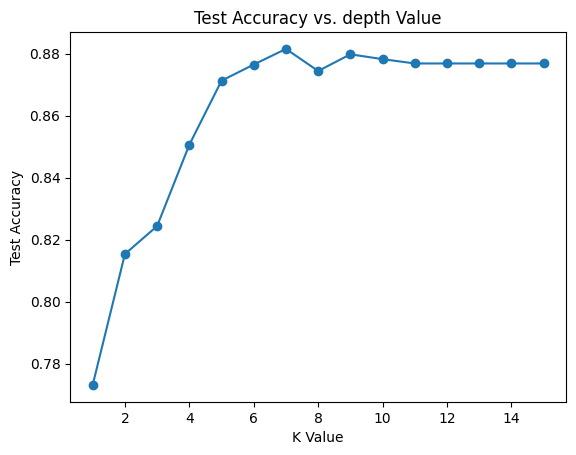

In [367]:
plt.plot(depth_values, result_decision_tree, marker='o')
plt.title('Test Accuracy vs. depth Value')
plt.xlabel('K Value')
plt.ylabel('Test Accuracy')
plt.show()

<a id=" SklearnImplementation"></a>
<h1 style='background:#3dec84;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Sklearn Implementation</center></h1>

#  Sklearn Implementation


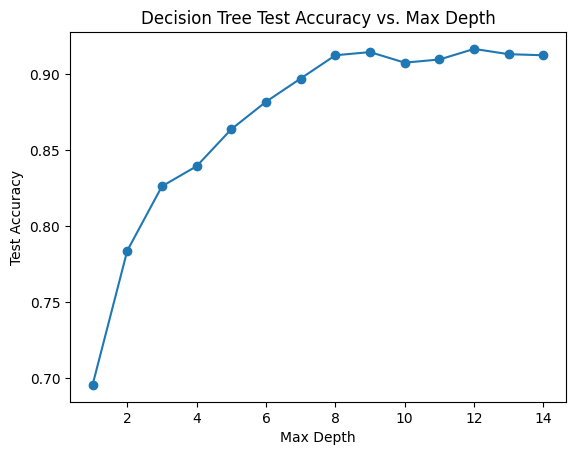

In [368]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assume you have your data loaded and split into predictor_test, predictor_Training, response_test, response_Training

# Define a range of depth values
depth_values = range(1, 15)

# Lists to store test accuracies
test_accuracies = []

# Train and evaluate Decision Tree for different depths
for depth in depth_values:
    # Create a decision tree classifier model object with the specified depth
    decision_tree_classifier = DecisionTreeClassifier(max_depth=depth)

    # Train the decision tree classifier model using the training data
    decision_tree_classifier.fit(predictor_Training_sklearn, response_Training_sklearn)

    # Use the trained model to make predictions on the test data
    predictions = decision_tree_classifier.predict(predictor_test_sklearn)

    # Calculate and store the test accuracy
    accu = accuracy_score(response_test_sklearn, predictions)
    test_accuracies.append(accu)

# Plotting the results
plt.plot(depth_values, test_accuracies, marker='o')
plt.title('Decision Tree Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.show()


# KNN IMPLEMENTATION


In [369]:
data = pd.read_csv('Q1Data.csv')
data
data['Genus'] = pd.factorize(data['Genus'])[0]
predictor = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
response = data.iloc[:,[22]]

predictor
response

predictor_Training_sklearn,predictor_test_sklearn,response_Training_sklearn,response_test_sklearn = train_test_split(predictor,response,test_size=0.2,shuffle=True,random_state=0)
predictor_Training, predictor_test, response_Training, response_test = train_test_split(predictor, response, test_size=0.1, shuffle=True, random_state=0)
predictor_Training, predictor_validation, response_Training, response_validation = train_test_split(predictor_Training, response_Training, test_size=0.66, shuffle=True, random_state=0)


In [370]:
predictor_Training = predictor_Training.values
predictor_test = predictor_test.values
response_Training = response_Training.values
response_test = response_test.values
predictor_Training_sklearn = predictor_Training_sklearn.values
predictor_test_sklearn = predictor_test_sklearn.values
response_Training_sklearn = response_Training_sklearn.values
response_test_sklearn = response_test_sklearn.values

In [371]:
class KNN:
  def __init__(self,neighbours = 5):
    self.neighbours = neighbours

  def dist(self,p,q):
   return np.sqrt(np.sum((p-q)**2))

  def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train

  def predict(self,X):
    n = X.shape[0]

    predictions = []

    for i in range(n):
      result = self.make_predictions(X[i])
      predictions.append(result)

    return np.array(predictions)


  def make_predictions(self,x):

    dlist = []
    m = self.X_train.shape[0]

    for i in range(m):

      distance = self.dist(x,self.X_train[i])

      dlist.append((distance,self.y_train[i]))


    dlist = sorted(dlist)

    dlist = np.array(dlist[:self.neighbours])
    labels = dlist[:,1]

    labels,cnts = np.unique(labels,return_counts = True)
    idx = cnts.argmax()
    pred = labels[idx]

    return int(pred)







In [372]:
def compute_accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    y_true (numpy array): A numpy array of true labels for each data point.
    y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    float: The accuracy of the model, expressed as a percentage.
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [373]:
result_knn = []
k_values = []
for i in range(10):
  model = KNN(i+1)
  model.fit(predictor_Training, response_Training)
  predictions = model.predict(predictor_test)
  accuracy = compute_accuracy(response_test, predictions)

  print(f" our model got accuracy score of : {accuracy}")
  k_values.append(i+1)
  result_knn.append(accuracy)

<ipython-input-371-5f55a5ece081>:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dlist = np.array(dlist[:self.neighbours])


 our model got accuracy score of : 0.9902777777777778
 our model got accuracy score of : 0.9888888888888889
 our model got accuracy score of : 0.9875
 our model got accuracy score of : 0.9861111111111112
 our model got accuracy score of : 0.9847222222222223
 our model got accuracy score of : 0.9791666666666666
 our model got accuracy score of : 0.9791666666666666
 our model got accuracy score of : 0.9708333333333333
 our model got accuracy score of : 0.975
 our model got accuracy score of : 0.9694444444444444


In [ ]:
plt.plot(k_values, result_knn, marker='o')
plt.title('Test Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

result_knn_sklearn = []
k_values_sklearn = []

for i in range(50):
  skmodel = KNeighborsClassifier(n_neighbors=i+1)
  skmodel.fit(predictor_Training_sklearn, response_Training_sklearn)
  sk_predictions = skmodel.predict(predictor_test_sklearn)
  sk_accuracy = compute_accuracy(response_test_sklearn, sk_predictions)
  result_knn_sklearn.append(sk_accuracy)
  k_values_sklearn.append(i+1)

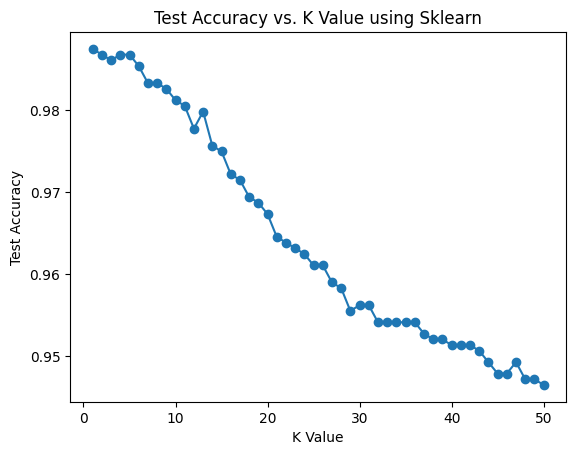

In [376]:
plt.plot(k_values_sklearn, result_knn_sklearn, marker='o')
plt.title('Test Accuracy vs. K Value using Sklearn')
plt.xlabel('K Value')
plt.ylabel('Test Accuracy')
plt.show()